In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:


df = pd.read_csv('telnetscan.csv', parse_dates = ['timestamp'] )


In [3]:
result = pd.read_csv('results2.csv')
result.head(10)

,X,authentication,refuse,disclosing
0,jpgonlineservices.nl,0.000000,0.000000,1.000000
1,qualityservices.nl,1.000000,0.000000,0.000000
2,xs4all.net,1.000000,0.000000,1.000000
3,videobutler.nl,1.000000,0.000000,0.000000
4,pilotedprofits.com,1.000000,0.000000,1.000000
5,sollie.nl,1.000000,0.000000,0.900000
6,telfortglasvezel.nl,0.784003,0.001079,0.199353
7,wulro.nl,0.000000,0.000000,0.000000
8,pagentex.com,1.000000,0.000000,1.000000
9,divaco.com,1.000000,0.000000,0.000000


In [40]:
end_result = pd.read_csv('results2.csv')
end_result.head(10)

,X,authentication,refuse,disclosing
0,jpgonlineservices.nl,0.000000,0.000000,1.000000
1,qualityservices.nl,1.000000,0.000000,0.000000
2,xs4all.net,1.000000,0.000000,1.000000
3,videobutler.nl,1.000000,0.000000,0.000000
4,pilotedprofits.com,1.000000,0.000000,1.000000
5,sollie.nl,1.000000,0.000000,0.900000
6,telfortglasvezel.nl,0.784003,0.001079,0.199353
7,wulro.nl,0.000000,0.000000,0.000000
8,pagentex.com,1.000000,0.000000,1.000000
9,divaco.com,1.000000,0.000000,0.000000


In [4]:
# df.ip.value_counts()
# df = df.drop_duplicates(['ip'])
df['timestamp'] = df['timestamp'].dt.date

In [5]:
days = df.timestamp.unique()
df.drop_duplicates(subset=['ip'], inplace=True)
df

,timestamp,ip,protocol,port,hostname,tag,asn,geo,region,city,naics,sic,banner
0,2018-01-01,185.42.87.77,tcp,2323,NaN,telnet-alt,206250,NL,ZUID-HOLLAND,ALPHEN AAN DEN RIJN,0,0,||||Account:
1,2018-01-01,88.159.38.196,tcp,2323,NaN,telnet-alt,39309,NL,UTRECHT,AMERSFOORT,0,0,SSH-2.0-OpenSSH_6.7p1 Raspbian-5+deb8u3|
2,2018-01-01,213.124.77.58,tcp,2323,d57c4d3a.static.ziggozakelijk.nl,telnet-alt,9143,NL,FRIESLAND,OOSTERWOLDE,0,0,||||Account:
3,2018-01-01,213.34.91.67,tcp,2323,d5225b43.static.ziggozakelijk.nl,telnet-alt,9143,NL,GELDERLAND,CULEMBORG,0,0,|Wandy v5.25|Login:
4,2018-01-01,188.205.51.226,tcp,2323,static.kpn.net,telnet-alt,1136,NL,NOORD-HOLLAND,AMSTERDAM,518210,737415,login:
5,2018-01-01,89.146.29.193,tcp,2323,rt29bb146-89-193.routit.net,telnet-alt,28685,NL,OVERIJSSEL,DEVENTER,0,0,|Account:
6,2018-01-01,84.243.226.221,tcp,2323,NaN,telnet-alt,39647,NL,NOORD-HOLLAND,AMSTERDAM,0,0,||||Account:
7,2018-01-01,85.149.75.146,tcp,2323,s55954b92.adsl.online.nl,telnet-alt,5390,NL,NOORD-HOLLAND,AMSTERDAM,0,0,-------------------------------|-----Welcome t...
8,2018-01-01,46.144.203.18,tcp,2323,static.kpn.net,telnet-alt,1136,NL,NOORD-HOLLAND,SCHIPHOL,518210,737415,|Login:
9,2018-01-01,82.176.123.186,tcp,2323,host-ikau8h.gry1.zeelandnet.nl,telnet-alt,15542,NL,ZEELAND,KOUDEKERKE,518210,737415,|Wandy v6.39.2 (stable)|Login:


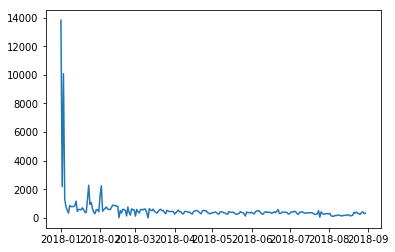

In [97]:
x = df.timestamp.value_counts().sort_index()
plt.plot(x)

In [24]:
df['hostname2'] = df.hostname.str.rsplit(".", n=2, expand=False)


In [25]:
df2 = df.dropna(subset = ["hostname2"])

In [26]:
df2['hostname2'] = df2.hostname2.apply(lambda x : str(x[-2]) + "." + str(x[-1]) if len(x) > 1 else x)



C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df2.hostname2.astype("str")
hosts = df2.hostname2.tolist()
res_hosts = list()
for s in hosts:
    if isinstance(s, str):
        res_hosts.append(s)
        
res_hosts = list(set(res_hosts))
print(len(res_hosts))


1746


In [20]:
df2['hostname2'] = df2['hostname2'].astype('str') 
df2.hostname2.unique


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<bound method Series.unique of 2             ziggozakelijk.nl
3             ziggozakelijk.nl
4                      kpn.net
5                   routit.net
7                    online.nl
8                      kpn.net
9                zeelandnet.nl
10                    ziggo.nl
11                  routit.net
13              hilftelecom.nl
15                xenosite.net
20                   online.nl
21                  routit.net
22                     kpn.net
23                  mainweb.nl
25                     kpn.net
28                   online.nl
30                xenosite.net
31            ziggozakelijk.nl
33                     kpn.net
35                     kpn.net
36                     kpn.net
37                     kpn.net
39               zeelandnet.nl
40                  routit.net
41                     kpn.net
42              onweerswolk.nl
45                    ziggo.nl
46                   hetnet.nl
47                    ziggo.nl
                  ...         
5095626 

In [ ]:
word_list = ["login", "username", "login" , "account", "user"]
endresult = dict()
hosts = df2.hostname2.tolist()
for host in hosts:
    df_host = df2.loc[df2['hostname2'] == host]
    result = list()
    for day in days:
        vc = df_host.loc[df_host.timestamp == day].banner.value_counts()
        total_banner = 0
        total_count = 0
        for banner,count in vc.items():
            for word in word_list:
                if word in  banner.lower():
        #             print(banner)
                    total_banner += 1 
                    total_count += count
                    break
        if len(df_host.loc[df_host.timestamp == day]) > 0:
            result.append(total_count/df_host.loc[df_host.timestamp == day].shape[0])
    endresult[host] = np.mean(result)

endresult

In [11]:
dfsld = df2.groupby(['hostname2'])
dfsld.head(10)
df3 = df2[['hostname2', 'region']]
df3.hostname2.unique
df2.region.unique()


array(['FRIESLAND', 'GELDERLAND', 'NOORD-HOLLAND', 'OVERIJSSEL',
       'ZEELAND', 'ZUID-HOLLAND', 'FLEVOLAND', 'UTRECHT', 'DRENTHE',
       'NOORD-BRABANT', 'LIMBURG', 'NETHERLANDS', 'GRONINGEN'],
      dtype=object)

In [16]:
df3.head(5)

,region
hostname2,
ziggozakelijk.nl,FRIESLAND
ziggozakelijk.nl,GELDERLAND
kpn.net,NOORD-HOLLAND
routit.net,OVERIJSSEL
online.nl,NOORD-HOLLAND


In [39]:
regions = ['FRIESLAND', 'GELDERLAND', 'NOORD-HOLLAND', 'OVERIJSSEL','ZEELAND', 'ZUID-HOLLAND', 'FLEVOLAND', 'UTRECHT', 'DRENTHE','NOORD-BRABANT', 'LIMBURG', 'NETHERLANDS', 'GRONINGEN']
# df3 = df3.reset_index('hostname2')
df4 = df3[df3['hostname2'].isin(res_hosts)]
df4[df4['hostname2'] == 'kpn.net'].region.value_counts()
result_host = dict()
df2.hostname2.astype("str")
hosts = df2.hostname2.tolist()
res_hosts = list()
for s in hosts:
    if isinstance(s, str):
        res_hosts.append(s)
        
res_hosts = list(set(res_hosts))
print(len(res_hosts))


for host in res_hosts:
    temp_r = df4[df4['hostname2'] == host].region.value_counts()
    result_host[host] = dict()
    total = 0
    for reg,v in temp_r.items():
        total = total+v
    if total >0:
        for reg,v in temp_r.items():
            result_host[host][reg] = v/total
            
result_host
# for  region in regions:    
#     test = df4.groupby(['hostname2']).agg(percentage_in_region = pd.NamedAgg(column='region', aggfunc= lambda x : int((x == region).sum()) / int(len(x)))).reset_index('hostname2').rename(columns={'percentage_in_region' : region})
#     result.merge(test)
#     print(test.head(10))
#     bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#     plt.hist(test[region].values, bins=bins, edgecolor="k")
#     plt.xticks(bins)
#     plt.xlabel('percentage of devices in:' + region)
#     plt.ylabel('amount of SLDs')

    
#     plt.show()
#     print(stats.spearmanr(results['authentication'],test[]))
    
# hosts = ['kpn-gprs.nl', 'versatel.nl', 'kpn.net', 'routit.net', 'ziggo.nl']   

# for host in hosts:
#     print(test[test.hostname2 == host])
    

1746


{'flex2go.nl': {'NOORD-HOLLAND': 1.0},
 'reenen.nl': {'ZUID-HOLLAND': 1.0},
 'iptp.net': {'NOORD-HOLLAND': 1.0},
 'dierenopvang.com': {'ZUID-HOLLAND': 1.0},
 'rolflex.com': {'OVERIJSSEL': 1.0},
 'nuonbeveiliging.nl': {'NOORD-BRABANT': 1.0},
 'be-da.mk': {'NOORD-HOLLAND': 1.0},
 'mdhrondhout.com': {'NOORD-HOLLAND': 1.0},
 'easynet.nl': {'UTRECHT': 0.375,
  'NOORD-HOLLAND': 0.375,
  'ZUID-HOLLAND': 0.25},
 'dlili7a.faith': {'NOORD-HOLLAND': 1.0},
 'bousse.fr': {'NOORD-HOLLAND': 1.0},
 'trined.nl': {'NOORD-BRABANT': 0.75, 'ZUID-HOLLAND': 0.2, 'FRIESLAND': 0.05},
 'besseling-group.com': {'ZUID-HOLLAND': 1.0},
 'best-coupondiscount.com': {'NOORD-HOLLAND': 1.0},
 'dt-it.nl': {'GELDERLAND': 1.0},
 'ipublications.net': {'GELDERLAND': 1.0},
 'zwaard.nl': {'UTRECHT': 1.0},
 'ek-hosting.net': {'FLEVOLAND': 1.0},
 'seabone.net': {'NOORD-HOLLAND': 1.0},
 'eurobesthosting.com': {'NOORD-BRABANT': 1.0},
 'steegman.nl': {'ZUID-HOLLAND': 1.0},
 '2tci.nl': {'NOORD-HOLLAND': 1.0},
 'caresse-cosmetics.nl':

In [51]:
result_host['kpn.net']

{'ZUID-HOLLAND': 0.26954633204633205,
 'NOORD-HOLLAND': 0.22876447876447875,
 'NOORD-BRABANT': 0.13175675675675674,
 'GELDERLAND': 0.10111003861003862,
 'UTRECHT': 0.0707046332046332,
 'LIMBURG': 0.04560810810810811,
 'FRIESLAND': 0.041023166023166024,
 'OVERIJSSEL': 0.03909266409266409,
 'GRONINGEN': 0.020511583011583012,
 'ZEELAND': 0.019305019305019305,
 'FLEVOLAND': 0.018822393822393823,
 'DRENTHE': 0.013754826254826255}

In [55]:
for reg in regions:
    end_result[reg] = 0.0

# end_result = end_result.set_index('X')

for host,province_dict in result_host.items():
    for province,perc in province_dict.items():
#         print(perc)
        end_result.ix[host,province]= perc

end_result.to_csv('fin3.csv')

    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [56]:
end_result.head()

,authentication,refuse,disclosing,FRIESLAND,GELDERLAND,NOORD-HOLLAND,OVERIJSSEL,ZEELAND,ZUID-HOLLAND,FLEVOLAND,UTRECHT,DRENTHE,NOORD-BRABANT,LIMBURG,NETHERLANDS,GRONINGEN
X,,,,,,,,,,,,,,,,
jpgonlineservices.nl,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qualityservices.nl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
xs4all.net,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
videobutler.nl,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pilotedprofits.com,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
types = ['authentication', 'refuse', 'disclosing']
for typex in types:
    print(typex)

    for region in regions:
            (cor_coff,p_val) =  stats.pearsonr(end_result[typex], end_result[region])
            print(region, round(cor_coff,3), round(p_val,3) )



authentication
FRIESLAND 0.077 0.001
GELDERLAND 0.056 0.02
NOORD-HOLLAND -0.104 0.0
OVERIJSSEL 0.036 0.134
ZEELAND -0.02 0.401
ZUID-HOLLAND 0.036 0.13
FLEVOLAND 0.021 0.377
UTRECHT -0.009 0.699
DRENTHE -0.013 0.596
NOORD-BRABANT 0.012 0.63
LIMBURG -0.011 0.647
NETHERLANDS 0.031 0.192
GRONINGEN -0.035 0.147
refuse
FRIESLAND -0.017 0.479
GELDERLAND 0.025 0.289
NOORD-HOLLAND -0.088 0.0
OVERIJSSEL 0.047 0.051
ZEELAND 0.051 0.032
ZUID-HOLLAND -0.047 0.051
FLEVOLAND 0.065 0.006
UTRECHT 0.011 0.645
DRENTHE -0.01 0.674
NOORD-BRABANT 0.073 0.002
LIMBURG 0.015 0.541
NETHERLANDS -0.013 0.582
GRONINGEN 0.002 0.94
disclosing
FRIESLAND -0.004 0.866
GELDERLAND -0.061 0.011
NOORD-HOLLAND 0.085 0.0
OVERIJSSEL -0.048 0.045
ZEELAND 0.024 0.316
ZUID-HOLLAND 0.042 0.078
FLEVOLAND -0.052 0.03
UTRECHT 0.001 0.973
DRENTHE -0.003 0.899
NOORD-BRABANT -0.069 0.004
LIMBURG -0.026 0.278
NETHERLANDS 0.015 0.525
GRONINGEN 0.024 0.311


In [103]:
df3.groupby(['hostname2']).nunique()

,hostname2,region
hostname2,,
0l.de,1,1
1.deltahost-ptr,1,1
10gbps.io,1,1
11.be,1,1
123friluft.no,1,1
...,...,...
zorgring.nl,1,1
zozze.biz,1,1
ztomy.com,1,1


In [16]:
# vc = df.banner.value_counts()

word_list_refuse = ["reject", "refused", "refuse", "rejected", 'block']
endresult2 = dict()

hosts = ['kpn-gprs.nl', 'versatel.nl', 'kpn.net', 'routit.net', 'ziggo.nl']                      
for host in hosts:
    df_host = df2.loc[df2['hostname2'] == host]
 
    result2 = list()
    for day in days:
        vc = df_host.loc[df_host.timestamp == day].banner.value_counts()
        total_banner_block = 0
        total_count_block = 0
        for banner,count in vc.items():
            for word in word_list_refuse:
                if(word in  banner.lower() or banner == ""):
        #             print(banner)
                    total_banner_block += 1 
                    total_count_block += count
                    break
        if len(df_host.loc[df_host.timestamp == day]) > 0:
            result2.append(total_count_block/df_host.loc[df_host.timestamp == day].shape[0])
    endresult2[host] = np.mean(result2)


In [17]:
endresult2

{'kpn-gprs.nl': 0.006282367086893936,
 'versatel.nl': 0.0005771450557906887,
 'kpn.net': 0.025131521553671266,
 'routit.net': 0.0575920946165807,
 'ziggo.nl': 0.01496843157363884}

In [31]:
# df.info()

hst = 'ziggo.nl'
# {'kpn-gprs.nl': 0.6237186949627803,
#  'versatel.nl': 0.996296958252756,
#  'kpn.net': 0.7876743917834791,
#  'routit.net': 0.8436739748229162,
#  'ziggo.nl': 0.7971509662783381}   


y = [endresult[hst], 1- endresult[hst]]
x = ["Authentication", "No authentication"]

Y = [endresult2[hst], 1 -endresult2[hst]]
X = ["Refuse", "Accept"]

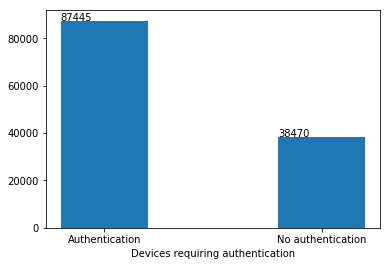

In [17]:
import matplotlib.pyplot as plt



bars = plt.bar(x, height=y, width=.4)

xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in x]
xlabs=[i for i in x]

plt.xlabel('Devices requiring authentication')

plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)

plt.show()

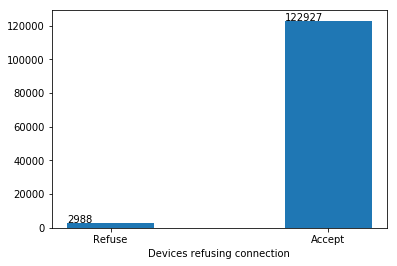

In [18]:
import matplotlib.pyplot as plt



bars = plt.bar(X, height=Y, width=.4)

xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in X]
xlabs=[i for i in X]

plt.xlabel('Devices refusing connection')

plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)

plt.show()

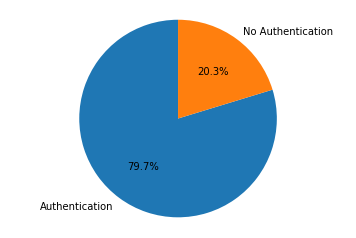

In [32]:
             


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Authentication', 'No Authentication'

fig1, ax1 = plt.subplots()
ax1.pie(y,  labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

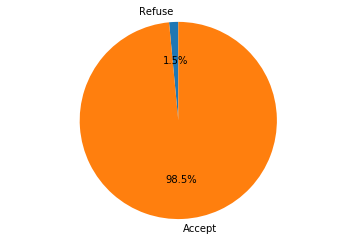

In [33]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels ="Refuse", "Accept"

fig1, ax1 = plt.subplots()
ax1.pie(Y,  labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()